# Testing the measure with a Pairwise graph as a 3-Hypergraph

In [1]:
import numpy as np
import xgi
import networkx as nx
import copy
from collections import OrderedDict
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

from hyperfunctions import *

In [2]:
def G_to_dict(G):
    '''
    Prepare the Networkx Graph for the Hypernetx package
    '''
    
    Gdict = {}
    
    for i, edge in enumerate(G.edges):
        Gdict['edge' + str(i)] = list(edge)
    
    return Gdict

In [3]:
n = 10

In [4]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Erdös-Renyi

In [5]:
G = nx.complete_graph(5)

In [6]:
while not nx.is_planar(G) or not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p=2*np.log(n)/n)

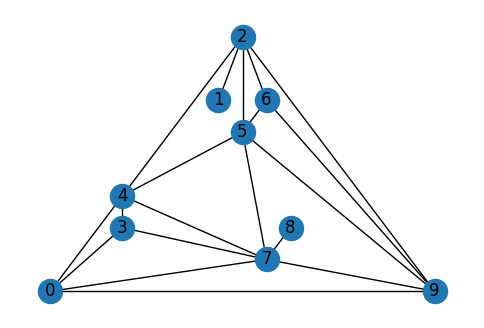

In [7]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

nx.draw_planar(G, ax=ax, with_labels=True)

In [8]:
EIG = list(nx.eigenvector_centrality_numpy(G).values())

In [9]:
edgedict = G_to_dict(G)
H = xgi.Hypergraph(edgedict)
#xgi.draw(H, node_labels=True, font_color_nodes="blue")

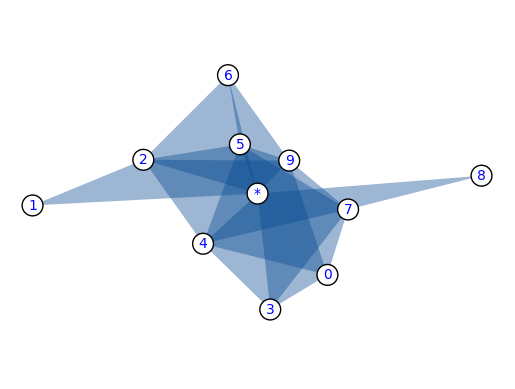

In [10]:
H3 = uniformize(H, m=3)
H4 = uniformize(H, m=4)
H5 = uniformize(H, m=5)
xgi.draw(H3, node_labels=True, font_color_nodes="blue")

In [11]:
np.linalg.eig(nx.to_numpy_array(G))[0]

array([ 4.45459036e+00,  2.08492684e+00, -2.35813933e+00, -2.00000000e+00,
        6.55125246e-01,  3.41522881e-01, -5.34822314e-17, -1.49592703e+00,
       -1.00000000e+00, -6.82098977e-01])

In [12]:
cstar = np.dot(EIG, np.dot(nx.to_numpy_array(G), EIG))
cstar 

4.4545903640939555

In [13]:
T = uniform_adjacency_combinatorial_tensor(H, m = None)
T3 = uniform_adjacency_combinatorial_tensor(H, m = 3)
T4 = uniform_adjacency_combinatorial_tensor(H, m = 4)
T5 = uniform_adjacency_combinatorial_tensor(H, m = 5)

In [14]:
np.dot(EIG, EIG)

0.9999999999999999

In [15]:
normEIG = EIG / np.sum(EIG)
normEIG

array([0.11072275, 0.02590677, 0.11540407, 0.08641298, 0.13261583,
       0.13661356, 0.08634183, 0.14159584, 0.0317865 , 0.13259986])

### m=3

In [16]:
ZEC = xgi.ZEC_centrality(H3, max_iter=10000, tol=1e-6)
ZEC

/home/gonzalo/.local/lib/python3.10/site-packages/xgi/algorithms/centrality.py:89: UserWarning: Iteration did not converge!
  warn("Iteration did not converge!")


{0: 0.09626450147962624,
 3: 0.07512911439621671,
 4: 0.11529876542208124,
 7: 0.12310616215059199,
 9: 0.11528487872656148,
 1: 0.022523850267351597,
 2: 0.1003345263632395,
 5: 0.11877446505145808,
 6: 0.07506725485616529,
 8: 0.027635798600671384,
 '*': 0.1305806826860366}

In [17]:
ZEC.pop('*')
myKeys = list(ZEC.keys())
myKeys.sort()
sZEC = {i: ZEC[i] for i in myKeys}
sZEC

{0: 0.09626450147962624,
 1: 0.022523850267351597,
 2: 0.1003345263632395,
 3: 0.07512911439621671,
 4: 0.11529876542208124,
 5: 0.11877446505145808,
 6: 0.07506725485616529,
 7: 0.12310616215059199,
 8: 0.027635798600671384,
 9: 0.11528487872656148}

In [18]:
ZECval = list(sZEC.values()) 
norm3ZEC = ZECval / np.sum(ZECval)
norm3ZEC

array([0.11072275, 0.02590677, 0.11540407, 0.08641298, 0.13261583,
       0.13661356, 0.08634183, 0.14159584, 0.0317865 , 0.13259986])

### m=4

In [19]:
ZEC = xgi.ZEC_centrality(H4, max_iter=10000, tol=1e-6)
ZEC

{0: 0.09230771821866371,
 3: 0.07204106410057576,
 4: 0.11055961217223773,
 7: 0.11804609957059833,
 9: 0.11054629626494766,
 1: 0.02159804696145544,
 2: 0.09621045187774817,
 5: 0.11389244927282909,
 6: 0.07198174718827229,
 8: 0.026499877636809003,
 '*': 0.16631663673586294}

In [20]:
ZEC.pop('*')
myKeys = list(ZEC.keys())
myKeys.sort()
sZEC = {i: ZEC[i] for i in myKeys}
sZEC

{0: 0.09230771821866371,
 1: 0.02159804696145544,
 2: 0.09621045187774817,
 3: 0.07204106410057576,
 4: 0.11055961217223773,
 5: 0.11389244927282909,
 6: 0.07198174718827229,
 7: 0.11804609957059833,
 8: 0.026499877636809003,
 9: 0.11054629626494766}

In [21]:
ZECval = list(sZEC.values()) 
norm4ZEC = ZECval / np.sum(ZECval)
norm4ZEC

array([0.11072275, 0.02590677, 0.11540407, 0.08641298, 0.13261583,
       0.13661356, 0.08634183, 0.14159584, 0.0317865 , 0.13259986])

### m=5

In [22]:
ZEC = xgi.ZEC_centrality(H5, max_iter=10000, tol=1e-6)
ZEC

{0: 0.10491827950347093,
 3: 0.08188290908813119,
 4: 0.12566364455249676,
 7: 0.13417289375200295,
 9: 0.1256485095008471,
 1: 0.02454865066064329,
 2: 0.10935418268441033,
 5: 0.12945179511246457,
 6: 0.0818154886328926,
 8: 0.03012014187286402,
 '*': 0.0524235046397764}

In [23]:
ZEC.pop('*')
myKeys = list(ZEC.keys())
myKeys.sort()
sZEC = {i: ZEC[i] for i in myKeys}
sZEC

{0: 0.10491827950347093,
 1: 0.02454865066064329,
 2: 0.10935418268441033,
 3: 0.08188290908813119,
 4: 0.12566364455249676,
 5: 0.12945179511246457,
 6: 0.0818154886328926,
 7: 0.13417289375200295,
 8: 0.03012014187286402,
 9: 0.1256485095008471}

In [24]:
ZECval = list(sZEC.values()) 
norm5ZEC = ZECval / np.sum(ZECval)
norm5ZEC

array([0.11072275, 0.02590677, 0.11540407, 0.08641298, 0.13261583,
       0.13661356, 0.08634183, 0.14159584, 0.0317865 , 0.13259986])